In [9]:
import os
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataUtils import *

SyntaxError: expected ':' (dataAnalysisUtils.py, line 127)

In [14]:
curDir = os.getcwd()
path = "/datasets/original/Release train and dev data/Train/"
fileName = "train2023."
lang = "vi"
fullPath = curDir + path + fileName + lang

In [15]:
with open(fullPath, 'r', encoding = 'utf8') as file:
    
    allLine = file.readlines()
    
    wordLevelLen, countEmptyLine = getLineLen(allLine, mode = 'word')
    
    charLevelLen, countEmptyLine1 = getLineLen(allLine, mode = 'character')    

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

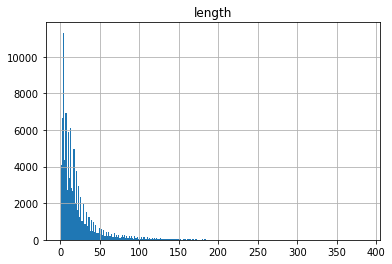

In [16]:
lenDF = pd.DataFrame(wordLevelLen, columns = ['length'])
lenDF.hist(bins = 265)

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

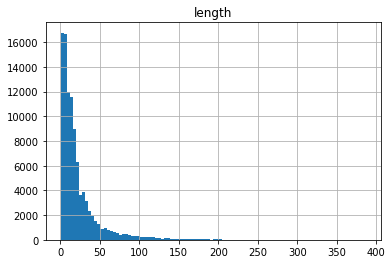

In [17]:
lenDF.hist(bins = 100)

In [18]:
lenDF.nunique()

length    265
dtype: int64

In [19]:
len(lenDF[lenDF['length'] < 144])

99077

In [20]:
len(lenDF[(lenDF['length'] <= 10) & (lenDF['length'] > 0)])

38442

In [21]:
len(set(allLine)), 1e5 - len(set(allLine))

(87118, 12882.0)

In [22]:
sentenceDF = pd.DataFrame(allLine, columns = ['sentence'])

In [23]:
(sentenceDF[sentenceDF['sentence'].duplicated(keep = False) == True])

,sentence
0,Nếu anh chị cảm thấy e ngại khi giới thiệu về ...
1,Hẳn nhiều người thấp kém e sợ và tránh mặt nhữ...
2,"21 Bấy giờ, khi hoàng hậu trông thấy vẻ kinh h..."
3,Quyết định để thay đổi thuộc vào chính các anh...
4,Những lựa chọn của các em ngay trước mắt là qu...
...,...
99918,Hỗ trợ email info@qdruidetai.com\n
99920,"GBP, £EUR, €CAD, $đô la, $JPY, ¥AUD, $NZD, $CH..."
99955,© Copyright - 2010-2019 : All Rights Reserved....
99956,Hebei Samsung Metal Wire Mesh Sản xuất Công ty...


In [24]:
truncatedSentenceDF = sentenceDF.truncate(before = 4e4, after = None)
(truncatedSentenceDF[truncatedSentenceDF['sentence'].duplicated(keep = False) == True])

,sentence
40001,Liên lạc với chúng tôi\n
40008,Đọc thêm:\n
40016,LIÊN HỆ\n
40025,Tìm kiếm:\n
40029,Ví dụ:\n
...,...
99918,Hỗ trợ email info@qdruidetai.com\n
99920,"GBP, £EUR, €CAD, $đô la, $JPY, ¥AUD, $NZD, $CH..."
99955,© Copyright - 2010-2019 : All Rights Reserved....
99956,Hebei Samsung Metal Wire Mesh Sản xuất Công ty...


# 0-10K + 10k-30k

In [31]:
curDir = os.getcwd()
path = "/datasets/modified/Release train and dev data/Train/"
fileName = "train2023_0to10k."
fileName1 = "train2023_10kto30k_cleaned."
fullPath = curDir + path + fileName
fullPath1 = curDir + path + fileName1

In [32]:
with open(fullPath + 'vi', 'r', encoding = 'utf8') as file10kVi, \
        open(fullPath + 'lo', 'r', encoding = 'utf8') as file10kLo, \
        open(fullPath1 + 'vi', 'r', encoding = 'utf8') as file30kVi, \
        open(fullPath1 + 'lo', 'r', encoding = 'utf8') as file30kLo:
    
    allLine10kVi = file10kVi.readlines()
    allLine10kLo = file10kLo.readlines()
    allLine30kVi = file30kVi.readlines()
    allLine30kLo = file30kLo.readlines()
    
    allLineVi = allLine10kVi + allLine30kVi
    allLineLo = allLine10kLo + allLine30kLo
    
    wordLevelLenVi, countEmptyLineVi = getLineLen(allLineVi, mode = 'word')
    
    charLevelLenVi, countEmptyLine1Vi = getLineLen(allLineVi, mode = 'character')    
    
    wordLevelLenLo, countEmptyLineLo = getLineLen(allLineLo, mode = 'word')
    
    charLevelLenLo, countEmptyLine1Lo = getLineLen(allLineLo, mode = 'character')    
    
    print(countEmptyLineVi, countEmptyLine1Vi)
    print(countEmptyLineLo, countEmptyLine1Lo)

0 0
0 0


In [44]:
wordLevelLenViDF = pd.DataFrame(wordLevelLenVi, columns = ['wordLevelLen'])
charLevelLenViDF = pd.DataFrame(charLevelLenVi, columns = ['charLevelLen'])
wordLevelLenLoDF = pd.DataFrame(wordLevelLenLo , columns = ['wordLevelLen'])
charLevelLenLoDF = pd.DataFrame(charLevelLenLo, columns = ['charLevelLen'])

wordLevelLen    138
dtype: int64
charLevelLen    489
dtype: int64
wordLevelLen    120
dtype: int64
charLevelLen    493
dtype: int64


wordLevelLen    138
dtype: int64
wordLevelLen    120
dtype: int64
27383
20318


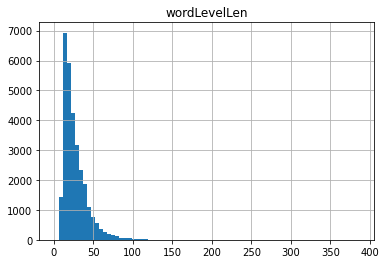

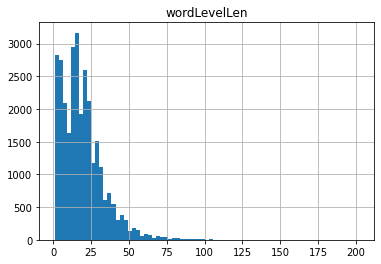

In [70]:
print(wordLevelLenViDF.nunique())
print(wordLevelLenLoDF.nunique())

wordLevelLenViDF.hist(bins = 75), wordLevelLenLoDF.hist(bins = 75)

print(len(wordLevelLenViDF[(wordLevelLenViDF['wordLevelLen'] <= 50) & (wordLevelLenViDF['wordLevelLen'] > 10)]))

print(len(wordLevelLenLoDF[(wordLevelLenLoDF['wordLevelLen'] <= 50) & (wordLevelLenLoDF['wordLevelLen'] > 10)]))

charLevelLen    489
dtype: int64
charLevelLen    493
dtype: int64
29010
29020


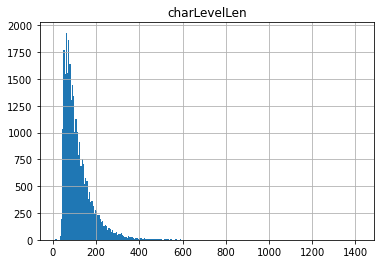

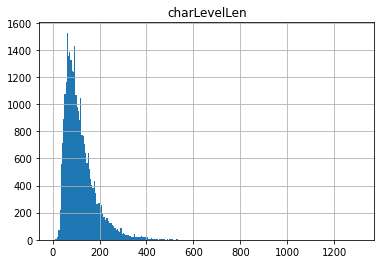

In [74]:
print(charLevelLenViDF.nunique())
print(charLevelLenLoDF.nunique())

charLevelLenViDF.hist(bins = 250), charLevelLenLoDF.hist(bins = 250)

print(len(charLevelLenViDF[(charLevelLenViDF['charLevelLen'] <= 300) & (charLevelLenViDF['charLevelLen'] > 10)]))

print(len(charLevelLenLoDF[(charLevelLenLoDF['charLevelLen'] <= 300) & (charLevelLenLoDF['charLevelLen'] > 10)]))

In [81]:
wordLevelLenViNP = np.array(wordLevelLenVi)
charLevelLenViNP = np.array(charLevelLenVi)
wordLevelLenLoNP = np.array(wordLevelLenLo)
charLevelLenLoNP = np.array(charLevelLenLo)

In [85]:
wordLevelLenRatio = wordLevelLenViNP / wordLevelLenLoNP
charLevelLenRatio = charLevelLenViNP / charLevelLenLoNP

In [87]:
wordLevelLenRatioDF = pd.DataFrame(wordLevelLenRatio, columns = ['wordLevelLenRatio'])
charLevelLenRatioDF = pd.DataFrame(charLevelLenRatio, columns = ['charLevelLenRatio'])

27815
28730


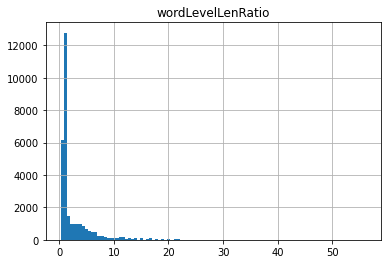

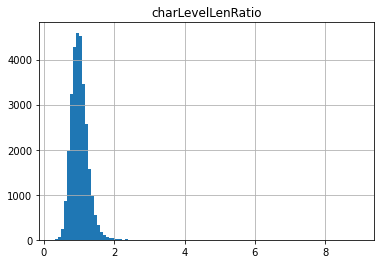

In [132]:
wordLevelLenRatioDF.nunique(), charLevelLenRatioDF.nunique()

wordLevelLenRatioDF.hist(bins = 100), charLevelLenRatioDF.hist(bins = 100)

print(len(wordLevelLenRatioDF[(wordLevelLenRatioDF['wordLevelLenRatio'] <= 8) & (wordLevelLenRatioDF['wordLevelLenRatio'] >= 0)]))

print(len(charLevelLenRatioDF[(charLevelLenRatioDF['charLevelLenRatio'] <= 1.5) & (charLevelLenRatioDF['charLevelLenRatio'] >= 0.5)]))

In [134]:
# combine0to30kDF = pd.DataFrame({
#     'vi': allLineVi,
#     'lo': allLineLo,
#     'charLevelLenRatio': charLevelLenRatio.tolist(),
# })
# 
# with open('train2023_combine0to30k_cleaned_thresholded.vi', 'w', encoding = 'utf8') as fileCleanedVi:
#     for line in (combine0to30kDF[(combine0to30kDF['charLevelLenRatio'] <= 1.5) & (combine0to30kDF['charLevelLenRatio'] >= 0.5)]['vi'].to_list()):
#         fileCleanedVi.write(line)
# 
# with open('train2023_combine0kto30k_cleaned_thresholded.lo', 'w', encoding = 'utf8') as fileCleanedLo:
#     for line in (combine0to30kDF[(combine0to30kDF['charLevelLenRatio'] <= 1.5) & (combine0to30kDF['charLevelLenRatio'] >= 0.5)]['lo'].to_list()):
#         fileCleanedLo.write(line)